In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***
***
## ЗАГРУЗКА ДАННЫХ И ПОВЕРХНОСТОЕ ЗНАКОМСТВО

In [217]:
hotels = pd.read_csv('hotels.csv')
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [218]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [219]:
hotels.describe(include=['object'])

,hotel_address,review_date,hotel_name,reviewer_nationality,negative_review,positive_review,tags,days_since_review
count,386803,386803,386803,386803,386803,386803,386803,386803
unique,1493,731,1492,225,248828,311737,47135,731
top,163 Marsh Wall Docklands Tower Hamlets London ...,8/2/2017,Britannia International Hotel Canary Wharf,United Kingdom,No Negative,No Positive,"[' Leisure trip ', ' Couple ', ' Double Room '...",1 days
freq,3587,1911,3587,184033,95907,26885,3853,1911


In [220]:
hotels.describe()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng
count,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.00000,386803.000000,384355.000000,384355.000000
mean,498.246536,8.397231,18.538988,2743.992042,17.776985,7.17725,8.396906,49.443522,2.823402
std,500.258012,0.547881,29.703369,2316.457018,21.726141,11.05442,1.636090,3.466936,4.579043
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.00000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.00000,7.500000,48.214662,-0.143649
50%,342.000000,8.400000,9.000000,2134.000000,11.000000,3.00000,8.800000,51.499981,-0.000250
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.00000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.00000,10.000000,52.400181,16.429233


In [221]:
hotels['hotel_name'].nunique()

1492

In [222]:
print(max(hotels['review_date']))
print(min(hotels['review_date']))

9/9/2016
1/1/2016


In [223]:
def rev_func(num_tags):
    num_tags = num_tags[2:-2]
    res = num_tags.strip().split(' \', \' ')
    return res

hotels['tags_n'] = hotels['tags'].apply(rev_func)
display(hotels.head())

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,tags_n
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,"[Leisure trip, Couple, Studio Suite, Stayed 2 ..."
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097,"[Business trip, Couple, Standard Double Room, ..."
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643,"[Leisure trip, Solo traveler, Modern Double Ro..."
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540,"[Leisure trip, Solo traveler, Standard Room wi..."
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060,"[Business trip, Couple, Standard Double or Twi..."


In [224]:
exploded_df = hotels.explode("tags_n",ignore_index = True)

In [225]:
exploded_df['tags_n'].nunique()

2368

In [226]:
exploded_df['tags_n'].value_counts()

tags_n
Leisure trip                         313593
Submitted from a mobile device       230778
Couple                               189212
Stayed 1 night                       145373
Stayed 2 nights                      100263
                                      ...  
Studio with Spa Access                    1
Comfort Family Room                       1
Junior Suite Free Wifi                    1
Design Suite                              1
Executive Double Room Non Smoking         1
Name: count, Length: 2368, dtype: int64

***
***
## ПРЕОБРАЗОВАНИЕ ДАТАСЕТА

Поработаем с датой, разбив ее на три столбца - день, месяц, год

In [227]:
hotels['review_date'] = pd.to_datetime(hotels['review_date'])
hotels['review_year'] = hotels['review_date'].dt.year
hotels['review_month'] = hotels['review_date'].dt.month
hotels['review_day'] = hotels['review_date'].dt.day
hotels = hotels.drop('review_date',axis=1)

Преобразуем строковый признак в целочисленный

In [228]:
def prog(st):
    st = st.split(' ')[0]
    st = int(st)
    return st
hotels['days_since_review'] = hotels['days_since_review'].apply(prog)

Удалим дублирующийся признак

In [229]:
hotels.drop('tags',axis=1)

,hotel_address,additional_number_of_scoring,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,lat,lng,tags_n,review_year,review_month,review_day
0,Stratton Street Mayfair Westminster Borough Lo...,581,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,531,51.507894,-0.143671,"[Leisure trip, Couple, Studio Suite, Stayed 2 ...",2016,2,19
1,130 134 Southampton Row Camden London WC1B 5AF...,299,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,203,51.521009,-0.123097,"[Business trip, Couple, Standard Double Room, ...",2017,1,12
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,289,48.845377,2.325643,"[Leisure trip, Solo traveler, Modern Double Ro...",2016,10,18
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,681,48.888697,2.394540,"[Leisure trip, Solo traveler, Standard Room wi...",2015,9,22
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,516,52.385601,4.847060,"[Business trip, Couple, Standard Double or Twi...",2016,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386798,9 Knaresborough Place Kensington and Chelsea L...,107,9.0,Hotel Moonlight,France,No Negative,0,617,Tr s proche du metro Earl s court,10,10,8.8,106,51.494028,-0.191050,"[Leisure trip, Group, Club Double or Twin Room...",2017,4,19
386799,Landstra er Hauptstra e 155 03 Landstra e 1030...,272,8.4,BEST WESTERN PLUS Amedia Wien,Turkey,No Negative,0,3224,The bed was so comfy I stayed with my boyfrie...,93,1,9.2,171,48.192379,16.399451,"[Leisure trip, Couple, Standard Double Room, S...",2017,2,13
386800,29 31 Gower Street Camden London WC1E 6HG Unit...,457,6.8,Bloomsbury Palace Hotel,Netherlands,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,9,21,8.3,543,51.520795,-0.131084,"[Business trip, Solo traveler, Single Room, St...",2016,2,7
386801,31 Great Cumberland Place Westminster Borough ...,365,8.1,The Marble Arch London,United Arab Emirates,No Negative,0,1567,Location and very comfy bed,6,28,9.2,74,51.515125,-0.160066,"[Leisure trip, Solo traveler, Deluxe Double Ro...",2017,5,21


Имеются пропуски в столбцах *'lat'* и *'lng'*. Изучим строки с пропусками

In [230]:
durty = hotels[hotels['lng'].isna()]['hotel_address']
display(durty.value_counts())

hotel_address
Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria    496
Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria            421
W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria       285
4 rue de la P pini re 8th arr 75008 Paris France               224
Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria         182
W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria          172
Savoyenstra e 2 16 Ottakring 1160 Vienna Austria               141
Bail n 4 6 Eixample 08010 Barcelona Spain                      113
Sieveringer Stra e 4 19 D bling 1190 Vienna Austria            112
Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria             63
23 Rue Damr mont 18th arr 75018 Paris France                    47
Hasenauerstra e 12 19 D bling 1190 Vienna Austria               44
Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria        40
Paragonstra e 1 11 Simmering 1110 Vienna Austria                34
20 Rue De La Ga t 14th arr 75014 Paris France   

In [231]:
durty1 = hotels[hotels['lat'].isna()]['hotel_address']
display(durty1.value_counts())

hotel_address
Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria    496
Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria            421
W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria       285
4 rue de la P pini re 8th arr 75008 Paris France               224
Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria         182
W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria          172
Savoyenstra e 2 16 Ottakring 1160 Vienna Austria               141
Bail n 4 6 Eixample 08010 Barcelona Spain                      113
Sieveringer Stra e 4 19 D bling 1190 Vienna Austria            112
Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria             63
23 Rue Damr mont 18th arr 75018 Paris France                    47
Hasenauerstra e 12 19 D bling 1190 Vienna Austria               44
Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria        40
Paragonstra e 1 11 Simmering 1110 Vienna Austria                34
20 Rue De La Ga t 14th arr 75014 Paris France   

Пропуски *'lat'* и *'lng'* находятся в одинаковых строках. Найдем информацию вручную, отелей немного

In [232]:
keys = durty.value_counts().index
values = [[48.21,16.37], [48.21,16.37], [48.21,16.37], [48.85,2.35], [48.21,16.37], [48.21,16.37], [48.21,16.37], [41.39,2.16], [48.21,16.37], 
          [48.21,16.37], [48.85,2.35], [48.21,16.37], [48.21,16.37], [48.21,16.37], [48.85,2.35], [41.39,2.16], [41.39,2.16]]

info = dict(zip(keys, values))
print(info)

{'Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria': [48.21, 16.37], 'Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria': [48.21, 16.37], 'W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria': [48.21, 16.37], '4 rue de la P pini re 8th arr 75008 Paris France': [48.85, 2.35], 'Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria': [48.21, 16.37], 'W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria': [48.21, 16.37], 'Savoyenstra e 2 16 Ottakring 1160 Vienna Austria': [48.21, 16.37], 'Bail n 4 6 Eixample 08010 Barcelona Spain': [41.39, 2.16], 'Sieveringer Stra e 4 19 D bling 1190 Vienna Austria': [48.21, 16.37], 'Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria': [48.21, 16.37], '23 Rue Damr mont 18th arr 75018 Paris France': [48.85, 2.35], 'Hasenauerstra e 12 19 D bling 1190 Vienna Austria': [48.21, 16.37], 'Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria': [48.21, 16.37], 'Paragonstra e 1 11 Simmering 1110 Vienna Austria': [48.21, 16.37], '20 Rue De La

In [233]:
for i in range(len(hotels['lat'])):
    addr = hotels['hotel_address'].iloc[i]
    if addr in keys:
        hotels['lat'].iloc[i] = info[addr][0]
        hotels['lng'].iloc[i] = info[addr][1]

C:\Users\Даша\AppData\Local\Temp\ipykernel_1104\1191779638.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels['lat'].iloc[i] = info[addr][0]
C:\Users\Даша\AppData\Local\Temp\ipykernel_1104\1191779638.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels['lng'].iloc[i] = info[addr][1]
C:\Users\Даша\AppData\Local\Temp\ipykernel_1104\1191779638.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels['lat'].iloc[i] = info[a

In [234]:
hotels['lat'] = hotels['lat'].apply(lambda x: round(x,1))
hotels['lng'] = hotels['lng'].apply(lambda x: round(x,1))

Создадим признак, представляющий собой комбинацию *'lat'* и *'lng'*

In [235]:
hotels['lat_lng'] = None

def sah(elem):
    res = []
    res.append(elem)
    return res
    
hotels['lat_lng'] = hotels['lat'].apply(sah)


for index in range(len(hotels['lat_lng'])):
    (hotels['lat_lng'].iloc[index]).append(hotels['lng'].iloc[index])

Создадим новый признак *'native'*, который будет обозначать, в своей стране отдыхал рецензент или ездил заграницу (1 - дома, 0 - заграница).

In [236]:
hotels['native'] = None

def sah(elem):
    elem = elem.strip()
    res = []
    res.append(elem)
    return res
    
hotels['native'] = hotels['reviewer_nationality'].apply(sah)

for index in range(len(hotels['hotel_address'])):
    (hotels['native'].iloc[index]).append(hotels['hotel_address'].iloc[index])
    
hotels['native'] = hotels['native'].apply(lambda x: 0 if x[1].find(x[0]) == -1 else 1)

Теперь обратимся к признаку *'reviewer_nationality'*. Изучим его и сделаем его категориальным

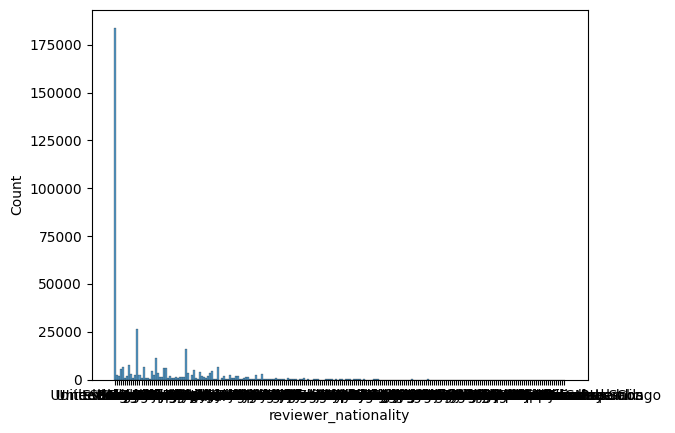

In [237]:
sns.histplot(
    data=hotels,
    x='reviewer_nationality',
    bins=30,
    kde=False
);

In [238]:
display(hotels['reviewer_nationality'].value_counts(normalize=True).head(20))

reviewer_nationality
 United Kingdom               0.475780
 United States of America     0.068616
 Australia                    0.041983
 Ireland                      0.028764
 United Arab Emirates         0.019692
 Saudi Arabia                 0.017378
 Netherlands                  0.017084
 Switzerland                  0.016799
 Canada                       0.015470
 Germany                      0.015398
 France                       0.014330
 Israel                       0.012714
 Italy                        0.011794
 Belgium                      0.011709
 Turkey                       0.010613
 Kuwait                       0.009571
 Spain                        0.009124
 Romania                      0.008855
 Russia                       0.007634
 South Africa                 0.007466
Name: proportion, dtype: float64

In [239]:
nation = hotels['reviewer_nationality'].value_counts(normalize=True).head(20).index

group = ['United Kingdom', 'United States of America', 'Australia', 'Ireland']

def sortt(elem):
    
    if elem in [' United Kingdom ', ' United States of America ', ' Australia ', ' Ireland ']:
        return elem
    else:
        return 'other'

hotels['reviewer_nationality'] = hotels['reviewer_nationality'].apply(sortt) 
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].astype('category')

Сделаем из *'days_since_review'* категориальный признак

In [240]:
def sortt(elem):
    if elem<100:
        return 1
    if elem>=100 and elem<200:
       return 2
    if elem>=200 and elem<300:
        return 3
    if elem>=300 and elem<400:
        return 4
    if elem>=400 and elem<500:
        return 5
    if elem>=500 and elem<600:
        return 6
    if elem>=600:
        return 7

hotels['days_since_review'] = hotels['days_since_review'].apply(sortt)     

Разберем столбец с тегами. Создадим новый признак / новые признаки.

In [241]:
exploded_df['tags_n'].value_counts().head(35)

tags_n
Leisure trip                      313593
Submitted from a mobile device    230778
Couple                            189212
Stayed 1 night                    145373
Stayed 2 nights                   100263
Solo traveler                      81235
Stayed 3 nights                    72000
Business trip                      61989
Group                              49088
Family with young children         45836
Stayed 4 nights                    35748
Double Room                        26386
Standard Double Room               24151
Superior Double Room               23550
Family with older children         19802
Deluxe Double Room                 18623
Double or Twin Room                16824
Stayed 5 nights                    15611
Standard Double or Twin Room       13062
Classic Double Room                12716
Superior Double or Twin Room       10238
2 rooms                             9287
Stayed 6 nights                     7399
Standard Twin Room                  7325
Single Ro

Отберем 20 популярных тегов

In [242]:
cat = exploded_df['tags_n'].value_counts().head(20)
cat_lst = list(cat.index)
display(cat_lst)

['Leisure trip',
 'Submitted from a mobile device',
 'Couple',
 'Stayed 1 night',
 'Stayed 2 nights',
 'Solo traveler',
 'Stayed 3 nights',
 'Business trip',
 'Group',
 'Family with young children',
 'Stayed 4 nights',
 'Double Room',
 'Standard Double Room',
 'Superior Double Room',
 'Family with older children',
 'Deluxe Double Room',
 'Double or Twin Room',
 'Stayed 5 nights',
 'Standard Double or Twin Room',
 'Classic Double Room']

Возьмем самые популярные тэги и создадим новые признаки для изучения их влияния на оценку отеля

In [243]:
hotels['tags_n'] = hotels['tags'].apply(rev_func)            
            
#Оставим только те тэги, которые вхдят в шестерку самых популярных и сделаем новые кодированные признаки
hotels['tags'] = hotels['tags_n'].apply(lambda x: list(set(x).intersection(cat_lst)))
 
hotels['Leisure trip'] = hotels['tags'].apply(lambda x: 1 if 'Leisure trip' in x else 0)
hotels['Submitted from a mobile device'] = hotels['tags'].apply(lambda x: 1 if 'Submitted from a mobile device' in x else 0)
hotels['Couple'] = hotels['tags'].apply(lambda x: 1 if 'Couple' in x else 0)
hotels['Stayed 1 night'] = hotels['tags'].apply(lambda x: 1 if 'Stayed 1 night' in x else 0)
hotels['Stayed 2 nights'] = hotels['tags'].apply(lambda x: 1 if 'Stayed 2 nights' in x else 0)
hotels['Solo traveler'] = hotels['tags'].apply(lambda x: 1 if 'Solo traveler' in x else 0)  

Создадим признак, в котором будет содержаться количество тэгов, поставленных рецензентом

In [244]:
hotels['tag_count'] = hotels['tags_n'].apply(lambda x: len(x))

hotels = hotels.drop(['tags_n'], axis=1)  
hotels = hotels.drop(['tags'], axis=1)

***

Приступим к анализу данных

<Axes: >

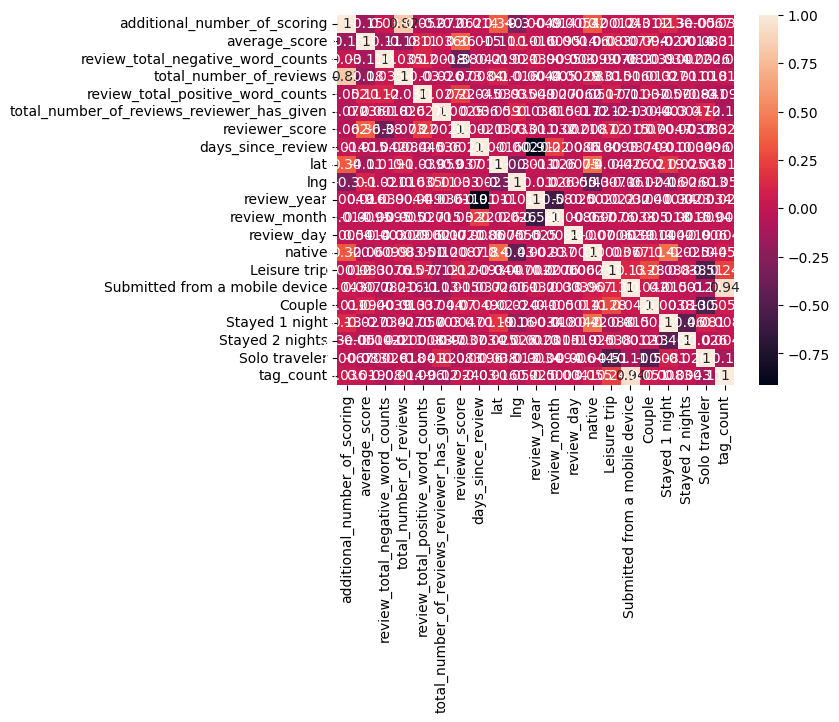

In [245]:
sns.heatmap(hotels.corr(numeric_only=True), annot=True)

Провертм данные на наличие дубликатов

In [246]:
display(hotels.head(10))

,hotel_address,additional_number_of_scoring,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,...,review_day,lat_lng,native,Leisure trip,Submitted from a mobile device,Couple,Stayed 1 night,Stayed 2 nights,Solo traveler,tag_count
0,Stratton Street Mayfair Westminster Borough Lo...,581,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,...,19,"[51.5, -0.1]",1,1,1,1,0,1,0,5
1,130 134 Southampton Row Camden London WC1B 5AF...,299,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,...,12,"[51.5, -0.1]",1,0,0,1,1,0,0,4
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,8.9,Legend Saint Germain by Elegancia,other,No kettle in room,6,406,No Positive,0,...,18,"[48.8, 2.3]",0,1,1,0,0,0,1,5
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,...,22,"[48.9, 2.4]",0,1,0,0,1,0,1,4
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,8.5,Golden Tulip Amsterdam West,other,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,...,5,"[52.4, 4.8]",0,0,0,1,0,0,0,4
5,Via Mecenate 121 20138 Milan Italy,105,8.0,Novotel Milano Linate Aeroporto,other,Nothing,2,1607,Very nice hotel Price is excellent when compa...,16,...,30,"[45.4, 9.3]",0,0,1,0,1,0,1,5
6,97 Cromwell Road Kensington and Chelsea London...,854,7.8,Holiday Inn London Kensington Forum,United Kingdom,Nothing it was lovely,6,3867,Very central location 2 minutes walk from Glo...,29,...,18,"[51.5, -0.2]",1,1,1,1,1,0,0,5
7,Josefsgasse 4 6 08 Josefstadt 1080 Vienna Austria,227,8.3,Mercure Josefshof Wien,United Kingdom,The communal areas are a bit soul less and th...,40,2526,The location is good for transport links espe...,107,...,23,"[48.2, 16.4]",0,1,0,1,0,0,0,4
8,190 Queen s Gate Kensington and Chelsea London...,227,8.6,The Gore Hotel Starhotels Collezione,United Kingdom,undergoing refurbishment no tea coffer in roo...,30,968,staff very good location wonderful,7,...,24,"[51.5, -0.2]",1,1,0,1,1,0,0,4
9,Holland Park Avenue Kensington and Chelsea Lon...,843,7.8,Hilton London Kensington Hotel,United Kingdom,I advised it was for my husbands birthday and...,47,3801,No Positive,0,...,2,"[51.5, -0.2]",1,1,1,1,1,0,0,5


In [247]:
display(len(hotels['lat_lng'].value_counts()))
display(hotels['lat_lng'].value_counts())

33

lat_lng
[51.5, -0.1]    89721
[51.5, -0.2]    77444
[41.4, 2.2]     37267
[48.9, 2.3]     30235
[52.4, 4.9]     27076
[45.5, 9.2]     25399
[48.2, 16.4]    24101
[51.5, -0.0]    18502
[52.4, 4.8]      7500
[41.4, 2.1]      7458
[52.3, 4.9]      6352
[48.8, 2.3]      6254
[48.9, 2.4]      6049
[51.6, -0.3]     4943
[48.2, 16.3]     4874
[51.5, -0.3]     2739
[48.8, 2.4]      2292
[51.6, -0.2]     1941
[45.5, 9.1]      1409
[52.3, 4.8]      1344
[45.4, 9.2]       749
[51.4, -0.2]      422
[41.3, 2.1]       407
[52.3, 5.0]       381
[52.4, 5.0]       353
[51.6, 0.1]       337
[51.5, -0.4]      320
[51.6, 0.0]       243
[45.4, 9.1]       183
[51.6, -0.1]      162
[45.4, 9.3]       143
[48.3, 16.3]      122
[48.3, 16.4]       81
Name: count, dtype: int64

Закодируем категориальные признаки *'reviewer_nationality'* и *'lat_lng'*.

In [248]:
import category_encoders as ce
hotels['lat_lng'] = hotels['lat_lng'].astype(str)

encoder = ce.OneHotEncoder(cols=['reviewer_nationality'], use_cat_names=True)
type_bin = encoder.fit_transform(hotels['reviewer_nationality'])
hotels = pd.concat([hotels,type_bin], axis=1)

encoder = ce.OneHotEncoder(cols=['lat_lng'], use_cat_names=True)
type_bin = encoder.fit_transform(hotels['lat_lng'])
hotels = pd.concat([hotels,type_bin], axis=1)

hotels = hotels.drop(['reviewer_nationality'], axis=1)  
hotels = hotels.drop(['lat_lng'], axis=1)

In [249]:
#hotels.set_option('display.max_rows', 30)
display(hotels.columns)

Index(['hotel_address', 'additional_number_of_scoring', 'average_score',
       'hotel_name', 'negative_review', 'review_total_negative_word_counts',
       'total_number_of_reviews', 'positive_review',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score',
       'days_since_review', 'lat', 'lng', 'review_year', 'review_month',
       'review_day', 'native', 'Leisure trip',
       'Submitted from a mobile device', 'Couple', 'Stayed 1 night',
       'Stayed 2 nights', 'Solo traveler', 'tag_count',
       'reviewer_nationality_ United Kingdom ', 'reviewer_nationality_other',
       'reviewer_nationality_ United States of America ',
       'reviewer_nationality_ Ireland ', 'reviewer_nationality_ Australia ',
       'lat_lng_[51.5, -0.1]', 'lat_lng_[48.8, 2.3]', 'lat_lng_[48.9, 2.4]',
       'lat_lng_[52.4, 4.8]', 'lat_lng_[45.4, 9.3]', 'lat_lng_[51.5, -0.2]',
       'lat_lng_[48.2, 16.4]', 'lat_lng_[41.4, 2.1]', 'lat_lng_[41.4, 

In [250]:
mask = hotels.duplicated()
fill_hotels_duplicates = hotels[mask]
print(f'Число найденных дубликатов: {fill_hotels_duplicates.shape[0]}')

Число найденных дубликатов: 316


Удалим дубликаты

In [251]:
hotels = hotels.drop_duplicates()

In [252]:
hotels = hotels.reset_index()

Проведем промежуточный анализ результатов

In [253]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split 

# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели
    
def mash_ed(data,stl):
    # Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
    # Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
    object_columns = [s for s in data.columns if data[s].dtypes == 'object']
    data.drop(object_columns, axis = 1, inplace=True)
    #data = data.fillna(0)
    X = data.drop([stl], axis = 1)  
    y = data[stl] 
      
    # Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
    # Для тестирования мы будем использовать 25% от исходного датасета.  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Создаём модель  
    regr = RandomForestRegressor(n_estimators=100)

    # Обучаем модель на тестовом наборе данных  
    regr.fit(X_train, y_train)  

    # Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
    # Предсказанные значения записываем в переменную y_pred  
    y_pred = regr.predict(X_test)  
    
    # Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
    # Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
    print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

In [254]:
fill_hotels_analis = hotels.copy()
mash_ed(fill_hotels_analis,'reviewer_score')

MAPE: 0.13548175206754212


Метрика немного уменьшилась, но говорить об успехе рано.


***

Перейдем к обнаружению выбросов. Сначала проверим интересующие признаки на нормальность с помощью графического анализа

In [255]:
fill_hotels = hotels.copy()

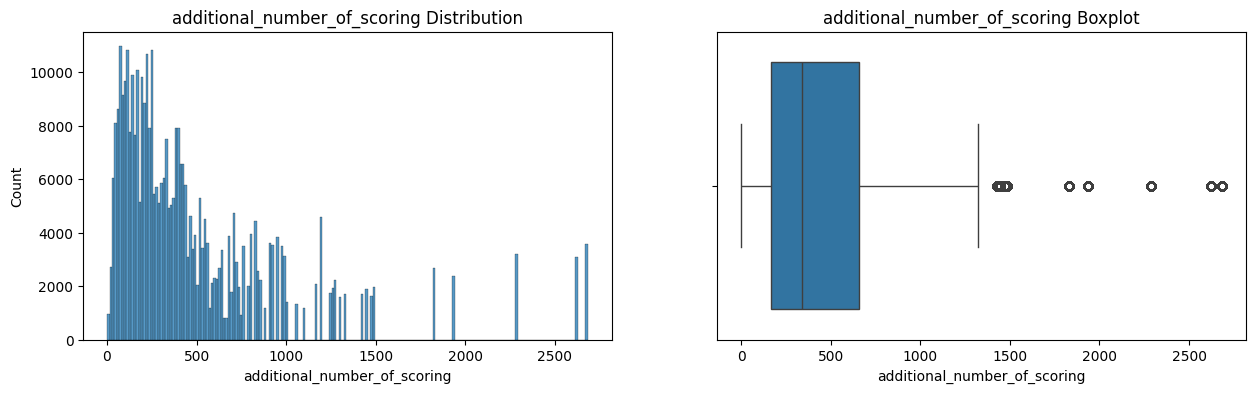

In [256]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=fill_hotels, x='additional_number_of_scoring', ax=axes[0]);
histplot.set_title('additional_number_of_scoring Distribution');
boxplot = sns.boxplot(data=fill_hotels, x='additional_number_of_scoring', ax=axes[1]);
boxplot.set_title('additional_number_of_scoring Boxplot');

In [257]:
fill_hotels = fill_hotels[fill_hotels['additional_number_of_scoring']<=1500]

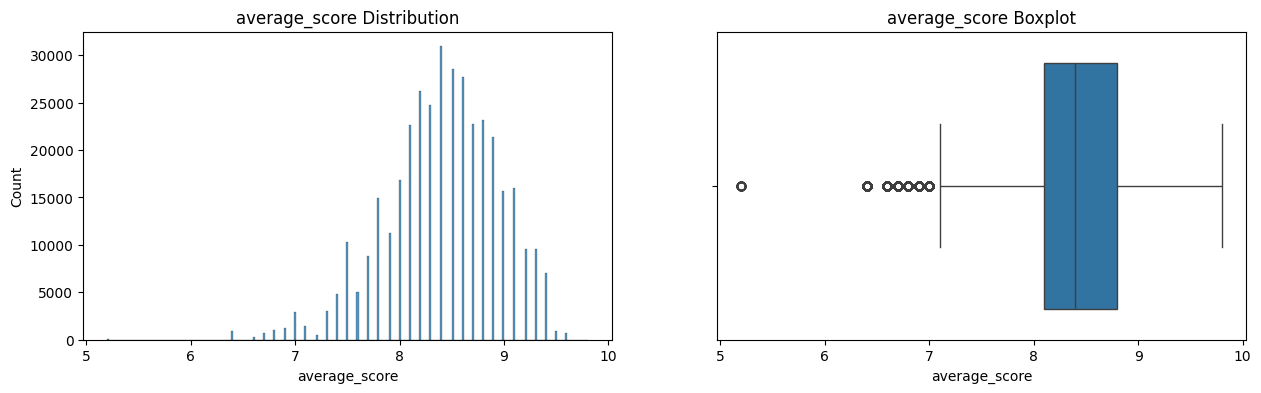

In [258]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=fill_hotels, x='average_score', ax=axes[0]);
histplot.set_title('average_score Distribution');
boxplot = sns.boxplot(data=fill_hotels, x='average_score', ax=axes[1]);
boxplot.set_title('average_score Boxplot');

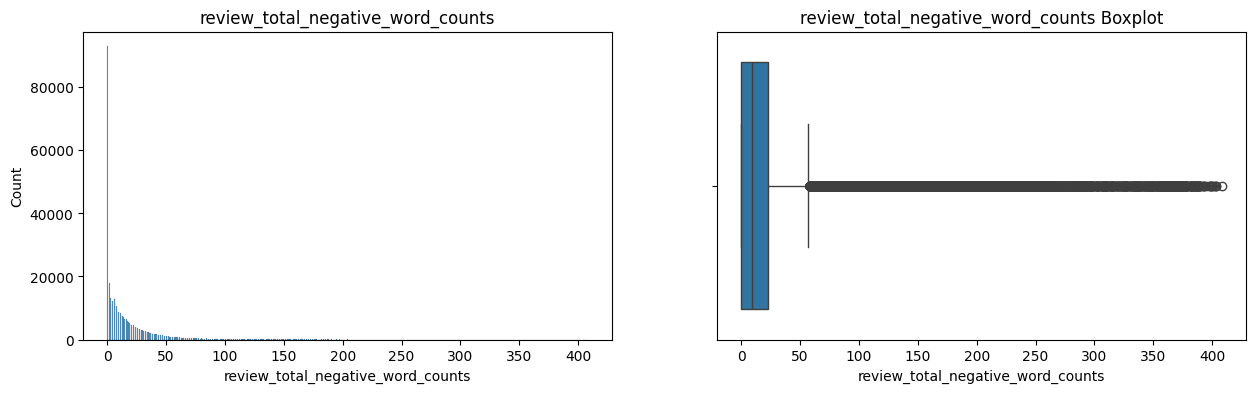

In [259]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=fill_hotels, x='review_total_negative_word_counts', ax=axes[0]);
histplot.set_title('review_total_negative_word_counts');
boxplot = sns.boxplot(data=fill_hotels, x='review_total_negative_word_counts', ax=axes[1]);
boxplot.set_title('review_total_negative_word_counts Boxplot');

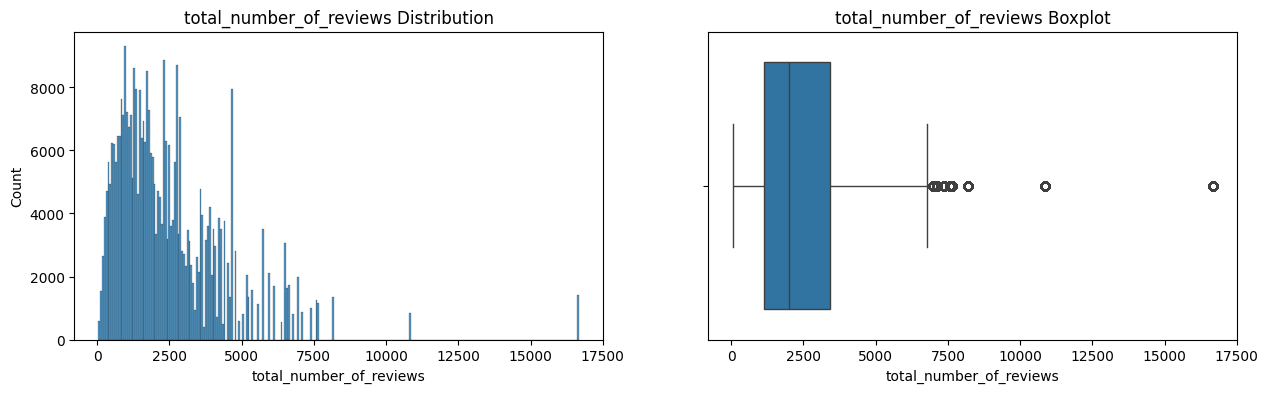

In [260]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=fill_hotels, x='total_number_of_reviews', ax=axes[0]);
histplot.set_title('total_number_of_reviews Distribution');
boxplot = sns.boxplot(data=fill_hotels, x='total_number_of_reviews', ax=axes[1]);
boxplot.set_title('total_number_of_reviews Boxplot');

In [261]:
fill_hotels = fill_hotels[fill_hotels['total_number_of_reviews']<=10000]

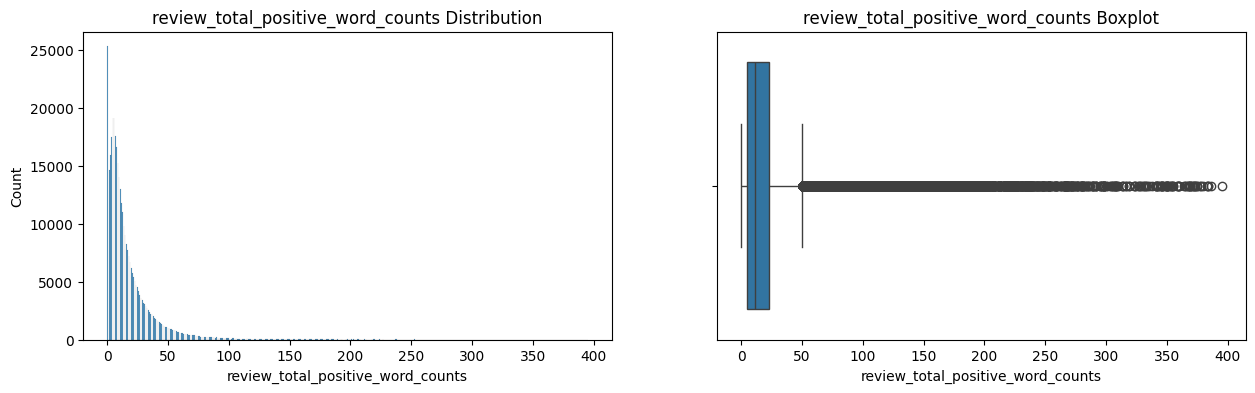

In [262]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=fill_hotels, x='review_total_positive_word_counts', ax=axes[0]);
histplot.set_title('review_total_positive_word_counts Distribution');
boxplot = sns.boxplot(data=fill_hotels, x='review_total_positive_word_counts', ax=axes[1]);
boxplot.set_title('review_total_positive_word_counts Boxplot');

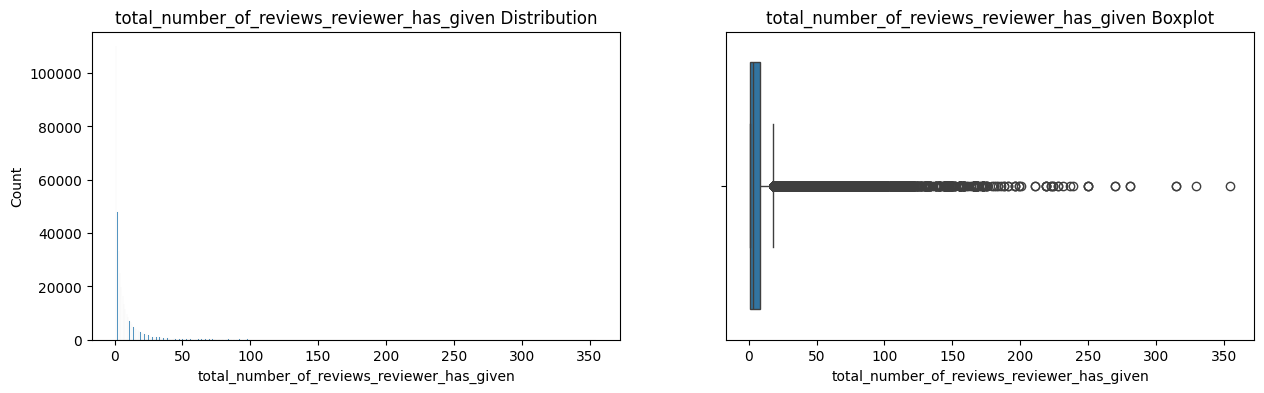

In [263]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=fill_hotels, x='total_number_of_reviews_reviewer_has_given', ax=axes[0]);
histplot.set_title('total_number_of_reviews_reviewer_has_given Distribution');
boxplot = sns.boxplot(data=fill_hotels, x='total_number_of_reviews_reviewer_has_given', ax=axes[1]);
boxplot.set_title('total_number_of_reviews_reviewer_has_given Boxplot');

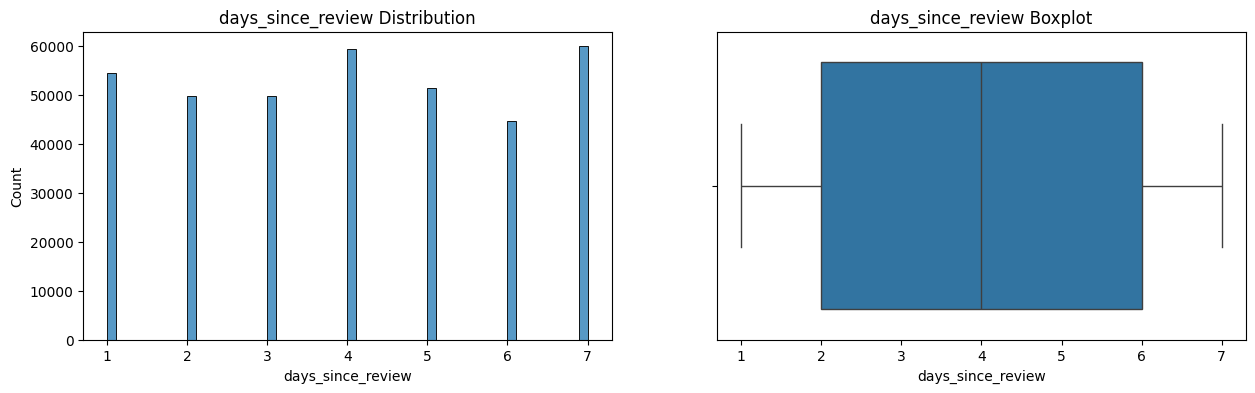

In [264]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=fill_hotels, x='days_since_review', ax=axes[0]);
histplot.set_title('days_since_review Distribution');
boxplot = sns.boxplot(data=fill_hotels, x='days_since_review', ax=axes[1]);
boxplot.set_title('days_since_review Boxplot');

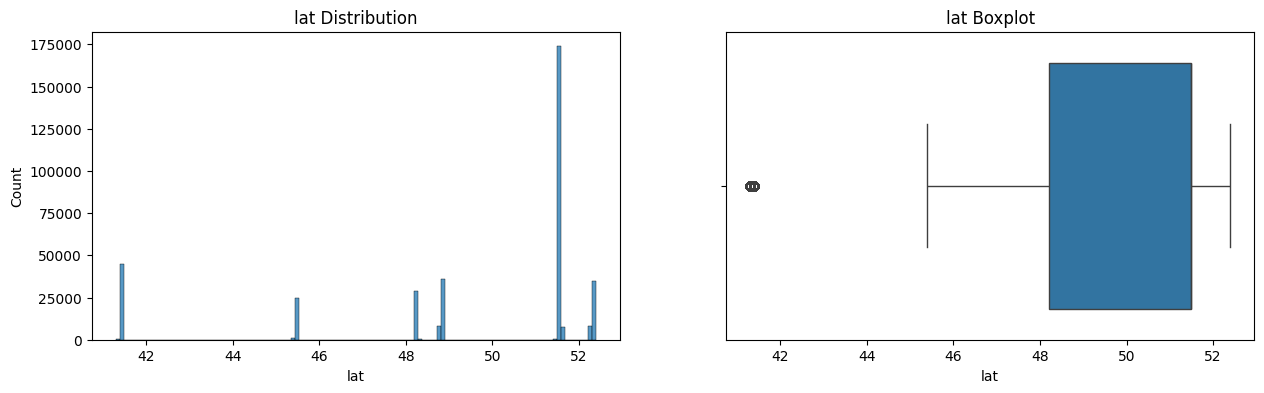

In [265]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=fill_hotels, x='lat', ax=axes[0]);
histplot.set_title('lat Distribution');
boxplot = sns.boxplot(data=fill_hotels, x='lat', ax=axes[1]);
boxplot.set_title('lat Boxplot');

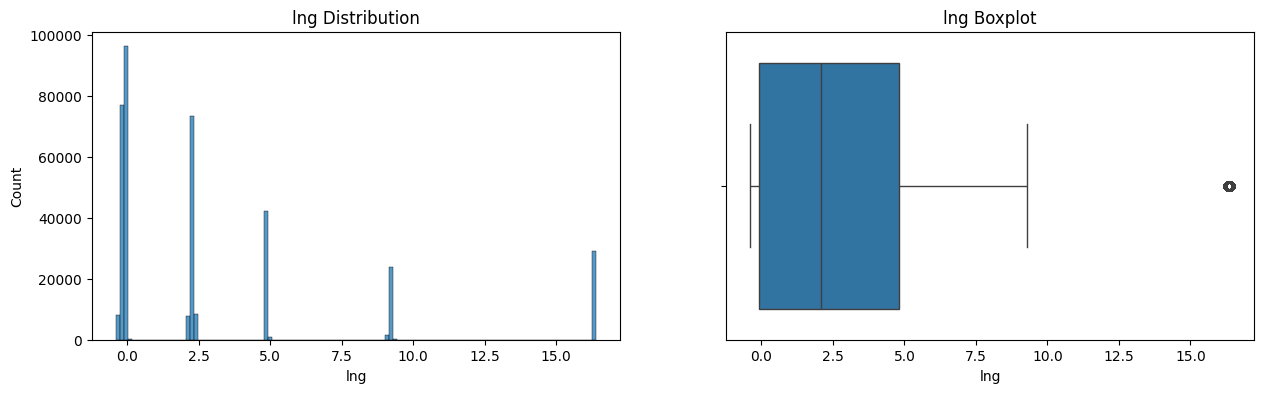

In [266]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=fill_hotels, x='lng', ax=axes[0]);
histplot.set_title('lng Distribution');
boxplot = sns.boxplot(data=fill_hotels, x='lng', ax=axes[1]);
boxplot.set_title('lng Boxplot');

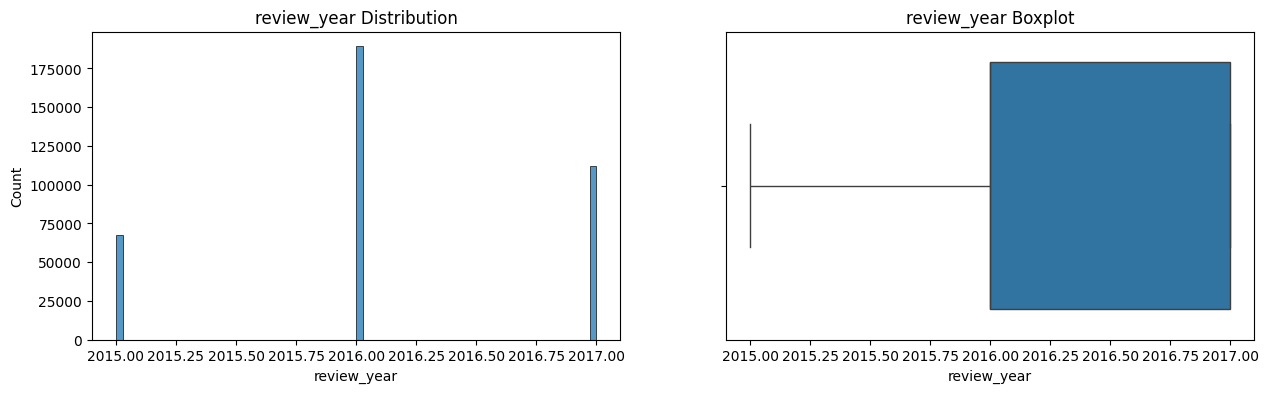

In [267]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=fill_hotels, x='review_year', ax=axes[0]);
histplot.set_title('review_year Distribution');
boxplot = sns.boxplot(data=fill_hotels, x='review_year', ax=axes[1]);
boxplot.set_title('review_year Boxplot');

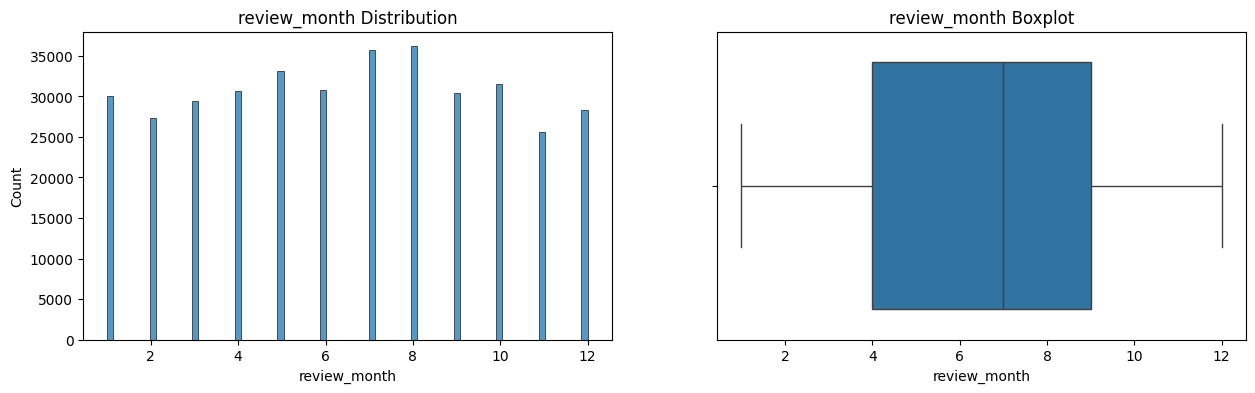

In [268]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=fill_hotels, x='review_month', ax=axes[0]);
histplot.set_title('review_month Distribution');
boxplot = sns.boxplot(data=fill_hotels, x='review_month', ax=axes[1]);
boxplot.set_title('review_month Boxplot');

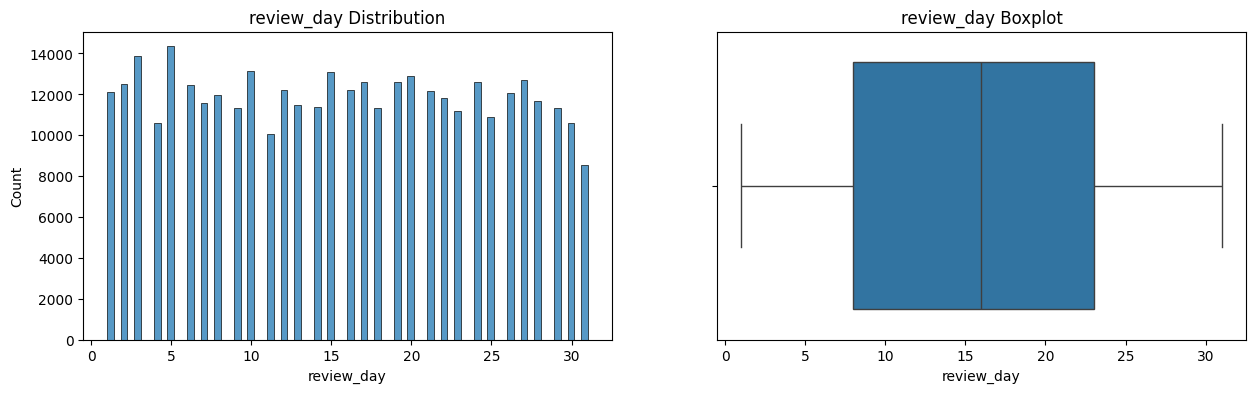

In [269]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=fill_hotels, x='review_day', ax=axes[0]);
histplot.set_title('review_day Distribution');
boxplot = sns.boxplot(data=fill_hotels, x='review_day', ax=axes[1]);
boxplot.set_title('review_day Boxplot');

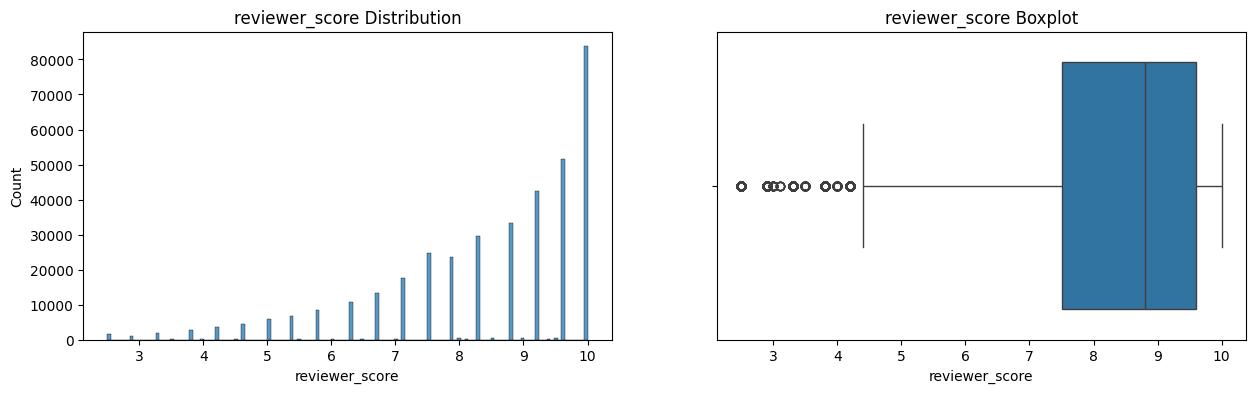

In [270]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=fill_hotels, x='reviewer_score', ax=axes[0]);
histplot.set_title('reviewer_score Distribution');
boxplot = sns.boxplot(data=fill_hotels, x='reviewer_score', ax=axes[1]);
boxplot.set_title('reviewer_score Boxplot');

Анализ показал, что признаки не являются нормально распределенными, к ним нельзя применить методы автоматического поиска выбросов. Поэтому на основе визуального анализа были удалены сильно выбивающиеся из общей картины данные.

In [271]:
fill_hotels = fill_hotels.reset_index()

***

Займемся нормализацией и стандартизацией признаков

In [272]:
from sklearn import preprocessing

col_names = list(fill_hotels[['review_total_negative_word_counts','review_total_positive_word_counts','total_number_of_reviews_reviewer_has_given',
                              'additional_number_of_scoring','total_number_of_reviews','average_score','days_since_review', 'review_year', 'review_month', 
                              'review_day','lat', 'lng', 'tag_count']]) 

fill_hotels_modern = fill_hotels[['review_total_negative_word_counts','review_total_positive_word_counts','total_number_of_reviews_reviewer_has_given',
                                  'additional_number_of_scoring','total_number_of_reviews','average_score','days_since_review', 'review_year', 'review_month',
                                  'review_day','lat', 'lng', 'tag_count']] 
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(fill_hotels_modern)
df_mm = pd.DataFrame(df_mm, columns=col_names)

Стандартизацию можно применять только к нормально распределенным признакам. Таких в данных нет. Вернем полученные значения в исходную таблицу.

In [273]:
fill_hotels = fill_hotels.drop(col_names, axis=1)
hotels_new = fill_hotels.join(
    df_mm,
    how='inner'
)
display(hotels_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369278 entries, 0 to 369277
Data columns (total 66 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   level_0                                          369278 non-null  int64  
 1   index                                            369278 non-null  int64  
 2   hotel_address                                    369278 non-null  object 
 3   hotel_name                                       369278 non-null  object 
 4   negative_review                                  369278 non-null  object 
 5   positive_review                                  369278 non-null  object 
 6   reviewer_score                                   369278 non-null  float64
 7   native                                           369278 non-null  int64  
 8   Leisure trip                                     369278 non-null  int64  
 9   Submitted from 

None

Проведем промежуточный анализ метрики после нормализации и стандартизации некоторых признаков

In [274]:
fill_hotels_analis = hotels_new.copy()
mash_ed(fill_hotels_analis,'reviewer_score')

MAPE: 0.13367863382872414


Поработаем с неинформативными признаками. Зададим порог в 95%.

In [275]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in hotels_new.columns:
    #наибольшая относительная частота в признаке
    top_freq = hotels_new[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = hotels_new[col].nunique() / hotels_new[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

level_0: 100.0% уникальных значений
index: 100.0% уникальных значений
reviewer_nationality_ Ireland : 97.14% одинаковых значений
reviewer_nationality_ Australia : 95.74% одинаковых значений
lat_lng_[48.8, 2.3]: 98.37% одинаковых значений
lat_lng_[48.9, 2.4]: 98.36% одинаковых значений
lat_lng_[52.4, 4.8]: 97.97% одинаковых значений
lat_lng_[45.4, 9.3]: 99.96% одинаковых значений
lat_lng_[41.4, 2.1]: 97.98% одинаковых значений
lat_lng_[51.6, -0.2]: 99.47% одинаковых значений
lat_lng_[51.5, -0.0]: 97.03% одинаковых значений
lat_lng_[52.3, 4.9]: 98.28% одинаковых значений
lat_lng_[48.8, 2.4]: 99.38% одинаковых значений
lat_lng_[51.5, -0.3]: 99.26% одинаковых значений
lat_lng_[48.2, 16.3]: 98.68% одинаковых значений
lat_lng_[51.6, -0.3]: 98.66% одинаковых значений
lat_lng_[51.5, 0.0]: 98.93% одинаковых значений
lat_lng_[51.4, -0.2]: 99.89% одинаковых значений
lat_lng_[52.3, 4.8]: 99.64% одинаковых значений
lat_lng_[45.5, 9.1]: 99.62% одинаковых значений
lat_lng_[51.6, 0.0]: 99.93% одинаков

In [276]:
hotels_new = hotels_new.drop(low_information_cols, axis=1)

In [277]:
fill_hotels_analis = hotels_new.copy()
mash_ed(fill_hotels_analis,'reviewer_score')

MAPE: 0.1340175513762199


In [278]:
display(hotels_new.tail())

,hotel_address,hotel_name,negative_review,positive_review,reviewer_score,native,Leisure trip,Submitted from a mobile device,Couple,Stayed 1 night,...,additional_number_of_scoring,total_number_of_reviews,average_score,days_since_review,review_year,review_month,review_day,lat,lng,tag_count
369273,9 Knaresborough Place Kensington and Chelsea L...,Hotel Moonlight,No Negative,Tr s proche du metro Earl s court,8.8,0,1,1,0,0,...,0.071429,0.070568,0.826087,0.166667,1.0,0.272727,0.600000,0.918919,0.011905,0.8
369274,Landstra er Hauptstra e 155 03 Landstra e 1030...,BEST WESTERN PLUS Amedia Wien,No Negative,The bed was so comfy I stayed with my boyfrie...,9.2,0,1,1,1,0,...,0.182615,0.391075,0.695652,0.166667,1.0,0.090909,0.400000,0.621622,1.000000,0.8
369275,29 31 Gower Street Camden London WC1E 6HG Unit...,Bloomsbury Palace Hotel,room is really small but guess is normal in L...,great location simple check in out nice shower,8.3,0,0,0,0,1,...,0.307278,0.332924,0.347826,0.833333,0.5,0.090909,0.200000,0.918919,0.017857,0.6
369276,31 Great Cumberland Place Westminster Borough ...,The Marble Arch London,No Negative,Location and very comfy bed,9.2,0,1,0,0,0,...,0.245283,0.187362,0.630435,0.000000,1.0,0.363636,0.666667,0.918919,0.011905,0.6
369277,25 Courtfield Gardens Kensington and Chelsea L...,The Nadler Kensington,Patio outside could have been cleaned of alga...,Beds comfortable Pillows also good Homely fee...,8.8,0,1,0,1,0,...,0.148922,0.143349,0.826087,0.500000,0.5,0.636364,0.133333,0.918919,0.011905,0.6


***
***

## Корреляция. Мультиколлинеарность

In [279]:
from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

In [280]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


In [281]:
hotels_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369278 entries, 0 to 369277
Data columns (total 35 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   hotel_address                                    369278 non-null  object 
 1   hotel_name                                       369278 non-null  object 
 2   negative_review                                  369278 non-null  object 
 3   positive_review                                  369278 non-null  object 
 4   reviewer_score                                   369278 non-null  float64
 5   native                                           369278 non-null  int64  
 6   Leisure trip                                     369278 non-null  int64  
 7   Submitted from a mobile device                   369278 non-null  int64  
 8   Couple                                           369278 non-null  int64  
 9   Stayed 1 night 

Разделим признаки на числовые и категориальные

In [282]:
object_columns = [s for s in hotels_new.columns if hotels_new[s].dtypes == 'object']
hotels_new.drop(object_columns, axis = 1, inplace=True)

col = hotels_new.columns
display(col)

Index(['reviewer_score', 'native', 'Leisure trip',
       'Submitted from a mobile device', 'Couple', 'Stayed 1 night',
       'Stayed 2 nights', 'Solo traveler',
       'reviewer_nationality_ United Kingdom ', 'reviewer_nationality_other',
       'reviewer_nationality_ United States of America ',
       'lat_lng_[51.5, -0.1]', 'lat_lng_[51.5, -0.2]', 'lat_lng_[48.2, 16.4]',
       'lat_lng_[41.4, 2.2]', 'lat_lng_[48.9, 2.3]', 'lat_lng_[52.4, 4.9]',
       'lat_lng_[45.5, 9.2]', 'review_total_negative_word_counts',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given',
       'additional_number_of_scoring', 'total_number_of_reviews',
       'average_score', 'days_since_review', 'review_year', 'review_month',
       'review_day', 'lat', 'lng', 'tag_count'],
      dtype='object')

In [283]:
# непрерывные признаки
num_cols = ['review_total_negative_word_counts',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given',
       'additional_number_of_scoring', 'total_number_of_reviews']

# категориальные признаки
cat_cols = ['native', 'Leisure trip',
       'Submitted from a mobile device', 'Couple', 'Stayed 1 night',
       'Stayed 2 nights', 'Solo traveler', 'tag_count',
       'reviewer_nationality_ United Kingdom ', 'reviewer_nationality_other',
       'reviewer_nationality_ United States of America ',
       'lat_lng_[51.5, -0.1]', 'lat_lng_[51.5, -0.2]', 'lat_lng_[48.2, 16.4]',
       'lat_lng_[41.4, 2.2]', 'lat_lng_[48.9, 2.3]', 'lat_lng_[52.4, 4.9]',
       'lat_lng_[45.5, 9.2]', 
       'average_score', 'days_since_review', 'review_year', 'review_month',
       'review_day', 'lat', 'lng']

In [284]:
X = hotels_new.drop(['reviewer_score'], axis = 1)  
y = hotels_new['reviewer_score']
y = y.astype('int')

Разберемся с непрерывными признаками

<Axes: >

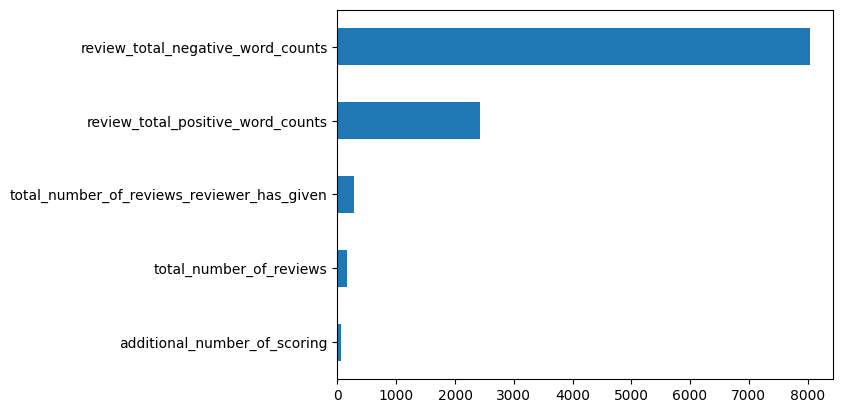

In [285]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

Изучим категориальные признаки

<Axes: >

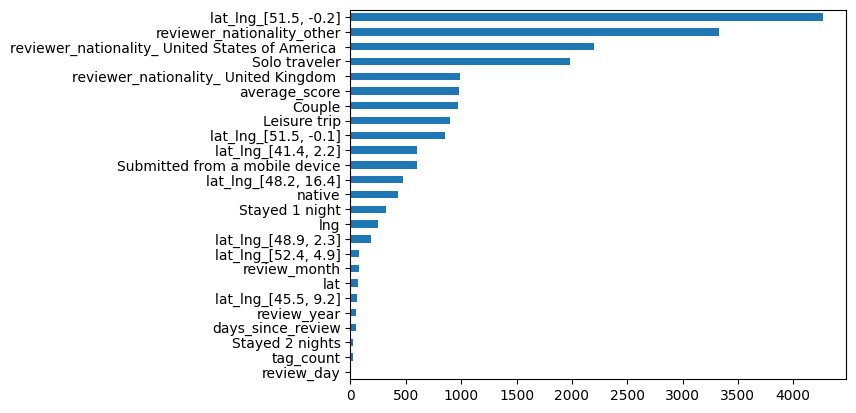

In [286]:
from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [287]:
fill_hotels_analis = hotels_new.copy()
mash_ed(fill_hotels_analis,'reviewer_score')

MAPE: 0.13410368162185485


In [295]:
hotels_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369278 entries, 0 to 369277
Data columns (total 31 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   reviewer_score                                   369278 non-null  float64
 1   native                                           369278 non-null  int64  
 2   Leisure trip                                     369278 non-null  int64  
 3   Submitted from a mobile device                   369278 non-null  int64  
 4   Couple                                           369278 non-null  int64  
 5   Stayed 1 night                                   369278 non-null  int64  
 6   Stayed 2 nights                                  369278 non-null  int64  
 7   Solo traveler                                    369278 non-null  int64  
 8   reviewer_nationality_ United Kingdom             369278 non-null  int64  
 9   reviewer_nation

In [300]:
for elem in hotels_new.columns:
    correlation = hotels_new['reviewer_score'].corr(hotels_new[elem])
    if abs(correlation) > 0.1:
        print(f'Корреляция между рейтингом и {elem}: {correlation}')

Корреляция между рейтингом и reviewer_score: 0.9999999999999999
Корреляция между рейтингом и Leisure trip: 0.11350457656503998
Корреляция между рейтингом и reviewer_nationality_other: -0.10525141307234473
Корреляция между рейтингом и lat_lng_[51.5, -0.2]: -0.11764273522914787
Корреляция между рейтингом и review_total_negative_word_counts: -0.3844955310405109
Корреляция между рейтингом и review_total_positive_word_counts: 0.21980785305990888
Корреляция между рейтингом и average_score: 0.36039748854261405


In [303]:
hotels_new_drop = hotels_new[['reviewer_score','Leisure trip','reviewer_nationality_other','lat_lng_[51.5, -0.2]','review_total_negative_word_counts',
                             'review_total_positive_word_counts','average_score']]

In [304]:
fill_hotels_analis = hotels_new_drop.copy()
mash_ed(fill_hotels_analis,'reviewer_score')

MAPE: 0.14181157382450926


In [288]:
stlb = imp_cat.sort_values(ascending=False).iloc[0:16]

In [289]:
display(stlb)

lat_lng_[51.5, -0.2]                               4267.428091
reviewer_nationality_other                         3327.629878
reviewer_nationality_ United States of America     2200.092277
Solo traveler                                      1982.113274
reviewer_nationality_ United Kingdom                986.628081
average_score                                       984.431575
Couple                                              973.148066
Leisure trip                                        897.037391
lat_lng_[51.5, -0.1]                                852.883816
lat_lng_[41.4, 2.2]                                 599.837374
Submitted from a mobile device                      596.505068
lat_lng_[48.2, 16.4]                                470.524614
native                                              429.847483
Stayed 1 night                                      321.008099
lng                                                 245.609164
lat_lng_[48.9, 2.3]                                 182

In [290]:
dropped = set(cat_cols) - set(stlb.index)

hotels_new_1 = hotels_new.drop(dropped, axis=1)

In [291]:
display(dropped)

{'Stayed 2 nights',
 'days_since_review',
 'lat',
 'lat_lng_[45.5, 9.2]',
 'lat_lng_[52.4, 4.9]',
 'review_day',
 'review_month',
 'review_year',
 'tag_count'}

In [293]:
fill_hotels_analis = hotels_new_1.copy()
mash_ed(fill_hotels_analis,'reviewer_score')

MAPE: 0.1356047906954899


Удаление малозначимых признаков в разных комбинациях не привело к улучшению метрики. Также не привело к улучшению метрики и удаление малоинформативных признаков. Лучший результат - **MAPE:  0.13367863382872414**

***
***